In [2]:
import requests
import json
import pandas as pd

In [3]:
import xmltodict

In [4]:
# 블로그 검색 키워드 눈에 띄는 데이터 뽑아서 진행
wordcloud_list = ['도담삼봉 여름', '속초해수욕장 여름', '오대산 가을', '강구항 봄', '경주 동궁 월지 여름', 
                  '한라산 겨울', '천지연 폭포 가을', '무주 덕유산 겨울', '임실치즈 가을', '오이도 가을', '경복궁 가을']

search_list = [val + " 관광지 정보" for val in wordcloud_list]
search_list


['도담삼봉 여름 관광지 정보',
 '속초해수욕장 여름 관광지 정보',
 '오대산 가을 관광지 정보',
 '강구항 봄 관광지 정보',
 '경주 동궁 월지 여름 관광지 정보',
 '한라산 겨울 관광지 정보',
 '천지연 폭포 가을 관광지 정보',
 '무주 덕유산 겨울 관광지 정보',
 '임실치즈 가을 관광지 정보',
 '오이도 가을 관광지 정보',
 '경복궁 가을 관광지 정보']

In [5]:
# 각 권역별 관광지 블로그 정보 검색

import os
import sys
import urllib.request
client_id = "w8ILnuQdGovKBscMo_DX"
client_secret = "YEVTZzisXF"

response_body = []

for idx, val in enumerate(search_list):
    encText = urllib.parse.quote(val)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&display=20" # JSON 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body.append(response.read())
        print(response_body[idx].decode('utf-8'))
    else:
        print("Error Code:" + rescode)



{
	"lastBuildDate":"Mon, 05 Feb 2024 17:31:25 +0900",
	"total":565,
	"start":1,
	"display":20,
	"items":[
		{
			"title":"단양 가볼만한곳 <b>도담삼봉<\/b> 석문 단양 구경시장 <b>관광지<\/b>",
			"link":"https:\/\/blog.naver.com\/1ove_honesty\/223310405073",
			"description":"단양 <b>관광지<\/b>랍니다. <b>도담삼봉<\/b> 근처는 항상 꽃밭으로 둘러싸여 어느 계절에 와도 예쁜 꽃을 볼 수 있는데요. 겨울은 예외인가 봅니다. 정말 매 계절에 갔지만 겨울은 영 휑~한 모습이.. <b>여름<\/b>에 <b>도담삼봉<\/b>을... ",
			"bloggername":"쥬디_여행 부추기는 여자♩",
			"bloggerlink":"blog.naver.com\/1ove_honesty",
			"postdate":"20240102"
		},
		{
			"title":"[단양여행6] 단양 <b>관광지<\/b> 추천 ; <b>도담삼봉<\/b>",
			"link":"https:\/\/blog.naver.com\/kitty2155\/222626678486",
			"description":"단양 <b>관광지<\/b> 추천 ; <b>도담삼봉<\/b> 단양 팔경 :-P 단양 팔경의 하나인 <b>도담삼봉<\/b>에 다녀왔다 남한강 상류 한가운데에 세개의 바위로 이루어져있음!! 여행 간날 눈도 소복하게 내려서 더더욱 이뻤다 &gt; &lt; ★ 가격<b>정보<\/b>... ",
			"bloggername":"농농한 하루",
			"bloggerlink":"blog.naver.com\/kitty2155",
			"postdate":"20220120"
		},
		{
			"title":"<b>여름<\/b> 국내여행 추천, 충북... 단양팔경 <b>도담삼봉<\/b>, 석문 가는 길... ",
			"l

In [6]:
import json
import pandas as pd

# 블로그 정보 받아오기
response_dicts = []

for val in response_body:
    response_dicts.append(json.loads(val))


In [7]:
import pandas as pd

# 블로그 정보 검색할 링크 주소 추가
df_links = []
for response_dict in response_dicts:
    dict_list = response_dict['items']
    df_1= pd.DataFrame(dict_list)

    df_links.append(df_1['link'].values)



In [8]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By


In [9]:
len(df_links)

11

In [10]:
# 일단 1/2번 두개만
# 워드 클라우드 내용을 저장할 빈 이차원 배열 만들기
contents_1 = []
list_size = len(wordcloud_list)

for i in range(list_size):
    contents_1.append([])

j = 0

for i in range(list_size):

    for link_url in df_links[i]:
        # print(link_url)
 
        driver = webdriver.Chrome()
        try:
            #블로그 링크 하나씩 불러오기
            print(link_url)

            # url = 'https://www.tmap.co.kr/static/trendmap_2020/tmap-trend/3-03.html'
            driver.get(link_url)

            time.sleep(1)
            #블로그 안 본문이 있는 iframe에 접근하기

            driver.switch_to.frame("mainFrame")
            #본문 내용 크롤링하기

            a = driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text
            contents_1[i].append(a)

            a = driver.find_element(By.CSS_SELECTOR,'div#content-area').text
            contents_1[i].append(a)

            
        # error 
        except Exception as ex: # 에러 종류
            print(ex)
            continue
        
        driver.quit() #창닫기
print("<<본문 크롤링이 완료되었습니다.>>")

https://blog.naver.com/1ove_honesty/223310405073
https://blog.naver.com/kitty2155/222626678486
https://blog.naver.com/fdtm17/222825317956
https://blog.naver.com/redsan56/120140846525
Message: no such element: Unable to locate element: {"method":"css selector","selector":"div.se-main-container"}
  (Session info: chrome=121.0.6167.140); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF682A05E42+3538674]
	(No symbol) [0x00007FF682624C02]
	(No symbol) [0x00007FF6824D5AEB]
	(No symbol) [0x00007FF68251BF4E]
	(No symbol) [0x00007FF68251C0CC]
	(No symbol) [0x00007FF68255E477]
	(No symbol) [0x00007FF68253F0EF]
	(No symbol) [0x00007FF68255BDE3]
	(No symbol) [0x00007FF68253EE53]
	(No symbol) [0x00007FF68250F514]
	(No symbol) [0x00007FF682510631]
	GetHandleVerifier [0x00007FF682A36CAD+3738973]
	GetHandleVerifier [0x00007FF682A8C506+4089270]
	GetHandleVerifier [0x

KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
# 불용어 리스트 불러오기
notinlist = pd.read_csv('./notinword_list.csv', encoding = 'cp949', names=['단어', 'n'], header=None)
not_in_list = list(notinlist['단어'])


In [13]:
# 불용어 제거 함수
def remove_stopwords(text):
    tokens = text
    # tokens = text.split(' ')
    stops = not_in_list
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)


In [14]:
# 블로그 내용 품사 및 불용어 거르기
from konlpy.tag import Okt
okt = Okt()

def get_wordcloud_str(contents_list):
    str_contents = ''.join(contents_list)
    konl_out = okt.nouns(str_contents) # okt.nouns : 명사 걸러내기
    konl_out = remove_stopwords(konl_out) # 불용어 거르기

    return konl_out



In [15]:
# 각 관광지별 워드 클라우드 그리기
from PIL import Image
import numpy as np

def print_wordcloud(text_contents, img_name, color_name, color_map):

    # icon = Image.open('./map_img4.png')    # 마스크가 될 이미지 불러오기
    icon = Image.open(img_name)    # 마스크가 될 이미지 불러오기
    # plt.imshow(icon)
    mask = Image.new("RGB", icon.size, (255,255,255))
    mask.paste(icon,icon)
    mask = np.array(mask)

    wc = WordCloud(background_color="white", # 배경색 지정
                max_words=100, # 출력할 최대 단어 수
                font_path='.\\NanumSquare_acEB.ttf', #폰트
                mask=mask, # 배경으로 사용할 이미지
                colormap=color_map, # !!추가!! 글자색 변경
                contour_width=0.5, # 테두리 굵기
                prefer_horizontal=True,
                contour_color=color_name) # 테두리 색

    cloud = wc.generate(text_contents)                            #사전형태 데이터

    plt.figure(figsize=(10,10))                                           #액자사이즈설정
    plt.axis('off')                                                       #테두리 선 없애기
    plt.imshow(cloud,interpolation="bilinear")

    plt.show()

    return



In [16]:
# 워드클라우드를 그리기 위해 색상 계절 정보 필요
season_list = [wc_name[-2:len(wc_name)] for wc_name in wordcloud_list]
wordcloud_list

['도담삼봉 여름',
 '속초해수욕장 여름',
 '오대산 가을',
 '강구항 봄',
 '경주 동궁 월지 여름',
 '한라산 겨울',
 '천지연 폭포 가을',
 '무주 덕유산 겨울',
 '임실치즈 가을',
 '오이도 가을',
 '경복궁 가을']

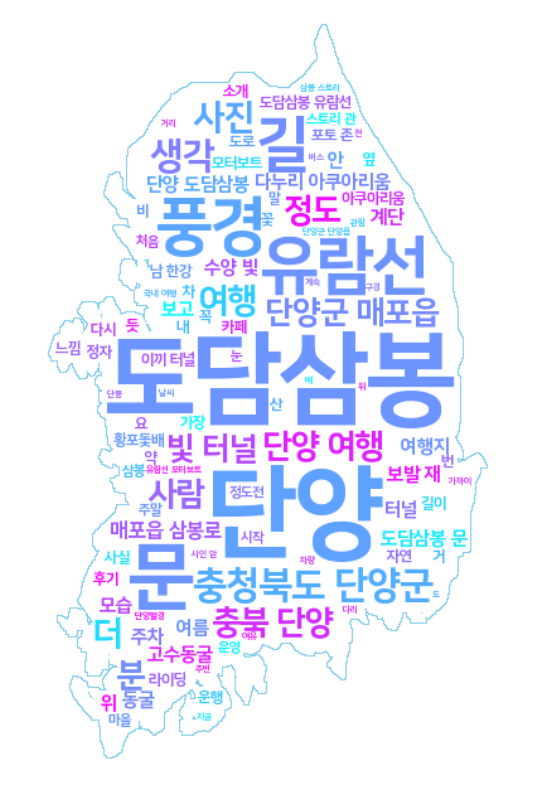

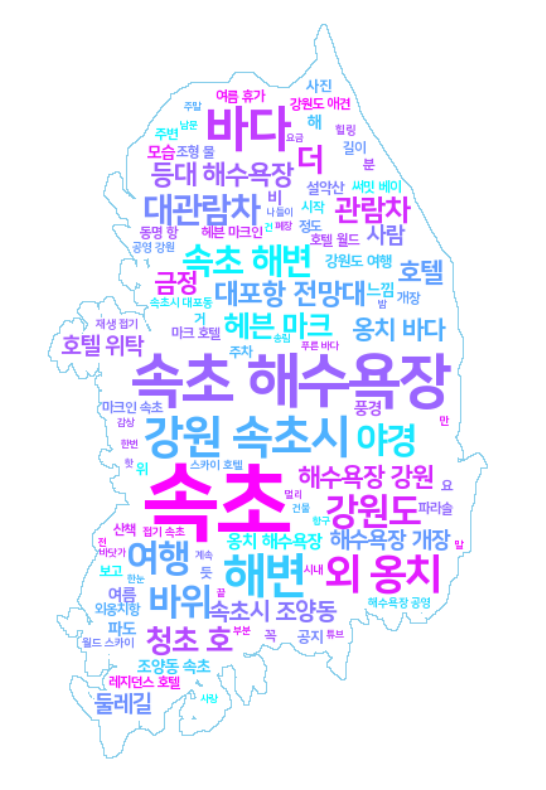

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [17]:
# 불용어 거른 후 워드클라우드 그리기
for i in range(list_size):
# for i in range(2):
    str_contents = ''.join(contents_1[i])
    
    # 불용어를 거르고 필수단어 가져옴
    konl_out2 = get_wordcloud_str(str_contents)
    
    # 계절 정보 이용하여 워드 클라우드 색상 선택
    if season_list[i] == '여름':
        color_name = 'skyblue'
        color_map = 'cool'
    elif season_list[i] == '가을':
        color_name = 'brown'
        color_map = 'YlOrBr'
    elif season_list[i] == '겨울':
        color_name = 'grey'
        color_map = 'binary'
    else:
        color_name = 'pink'
        color_map = 'PiYG'     

    # 제주도는 이미지 변경
    if (wordcloud_list[i][:3] == '한라산') | (wordcloud_list[i][:3] == '천지연'):
        image_name = './map_img5.png'
    else:
        image_name = './map_img4.png'

    # 실제 워드 클라우드 그리기 
    print_wordcloud(konl_out2, image_name, color_name, color_map)